# Preprocessing & Feature Engineering

### 1. Preprocessing : Character-to-vector Embedding
- Sequence of Characters
- Embedding Layer

### 2. Feature Engineering 
- Synactics Extraction_Step01: Character-level Unicode Method
- Synactics Extraction_Step02: Character-level One-hot Encoding

In [42]:
#Copyright 2019, Seokjun Bu, Softcomputing LAB all rights reserved.
%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
n_neutral, n_phishing = 45000, 15000
n_max_char = 100

# skiprows: 행 건너뛰기, header=None: 칼럼이름이 없다
dataset_neutral = pd.read_csv('../input/url_0.csv', header=None, skiprows=0).sample(n=n_neutral, random_state=11)
dataset_neutral = dataset_neutral[1].values

dataset_phishing = pd.read_csv('../input/url_1.csv', header=None, skiprows=0).sample(n=n_phishing, random_state=11)
dataset_phishing = dataset_phishing[1].values

In [3]:
dataset_neutral.shape, dataset_phishing.shape

((45000,), (15000,))

### 1. Preprocessing
- Sequence of Characters
- Embedding Layer

In [4]:
dataset_neutral[1]

'http://www.cybertruffle.org.uk/vinales/eng/schefflera_morototoni.htm'

In [5]:
def length_info(input_str_np):
    min_length, avg_length, max_length = 999, 0, 0
    for r in range(input_str_np.shape[0]):
        length_buffer = len(input_str_np[r])
        if length_buffer > max_length:
            max_length = length_buffer
        if length_buffer < min_length:
            min_length = length_buffer
        avg_length += length_buffer
    avg_length /= input_str_np.shape[0]
    return (min_length, avg_length, max_length)
print(length_info(dataset_neutral))
print(length_info(dataset_phishing))    

(14, 35.8264, 441)
(12, 75.73886666666667, 4096)


#### Phising url의 길이가 Benign url 보다 평균 길이가 약 2배 더 길다.

In [6]:
dataset_string = []
for r in range(dataset_neutral.shape[0]):
    row_buffer = []
    row_buffer.append(0)
    row_buffer.append(dataset_neutral[r])
    dataset_string.append(row_buffer)
for r in range(dataset_phishing.shape[0]):
    row_buffer = []
    row_buffer.append(1)
    row_buffer.append(dataset_phishing[r])
    dataset_string.append(row_buffer)
    
print(dataset_string)
dataset_string = np.array(dataset_string)
print(dataset_string, dataset_string.shape)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[['0' 'http://www.meigaoyi.com']
 ['0'
  'http://www.cybertruffle.org.uk/vinales/eng/schefflera_morototoni.htm']
 ['0' 'http://prague.tv/funny-pictures-archive/']
 ...
 ['1'
  'http://www.auto-ecole-rennes.com/wp-includes/Text/Diff/83b3926efe21b0905f3eddd62a07bbeb/1/']
 ['1'
  'http://coolestspotontheweb.com/wp-content/plugins/ubh/agrement/a78b30fdd6908e5aa971670752a62dfa/customer_center/customer-IDPP00C572/myaccount/signin/']
 ['1'
  'http://www.niagamall.com/wp-includes/widgets/bankingofamerica.com/update.html']] (60000, 2)


### 2. Feature Engineering
- Synactics Extraction_Step01: Character-level Unicode Method
- Synactics Extraction_Step02: Character-level One-hot Encoding

In [30]:
###############################################################
# Synactics Extraction_Step01: Character-level Unicode Method #
###############################################################

dataset_np = np.zeros((n_neutral+n_phishing, n_max_char+1))
for r in range(dataset_neutral.shape[0]):
    dataset_np[r, 0] = 0
    length_buffer = len(dataset_neutral[r])
    for c in range(n_max_char):
        if c < length_buffer:
            dataset_np[r, c+1] = ord(dataset_neutral[r][c])
        else:
            break
for r in range(dataset_phishing.shape[0]):
    dataset_np[r+dataset_phishing.shape[0], 0] = 1
    length_buffer = len(dataset_phishing[r])
    for c in range(n_max_char):
        if c < length_buffer:
            dataset_np[r + dataset_neutral.shape[0], c+1] = ord(dataset_phishing[r][c])
        else:
            break
print(dataset_np)            

[[  0. 104. 116. ...   0.   0.   0.]
 [  0. 104. 116. ...   0.   0.   0.]
 [  0. 104. 116. ...   0.   0.   0.]
 ...
 [  0. 104. 116. ...   0.   0.   0.]
 [  0. 104. 116. ... 117. 115. 116.]
 [  0. 104. 116. ...   0.   0.   0.]]


1.0


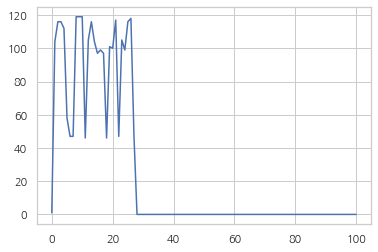

0.0


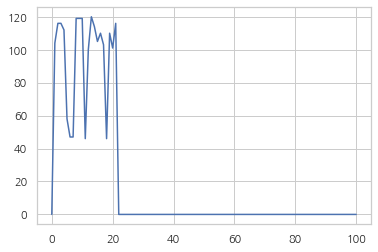

1.0


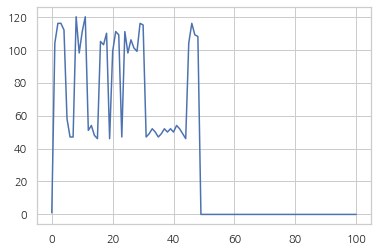

In [62]:
# Visualize char samples
n_v_sample = 3
rand_idx = np.random.randint(0, dataset_np.shape[0], n_v_sample)
for r in range(rand_idx.shape[0]):
    print(dataset_np[rand_idx[r], 0])
    plt.plot(dataset_np[rand_idx[r]])
    plt.show()